# Laplace Results

In [5]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from src.autoks.postprocessing.summarize_group import _parse_experiment_group
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

### Define plotting functions

In [3]:
def plot_mean_pm_std(data, ax=None, plot_confidence=True, **kwargs):
    ax = ax or plt.gca()
    x = np.arange(data.shape[1])
    mu = np.mean(data, axis=0)
    
    if plot_confidence:
        std = np.std(data, axis=0)
        confidence = (mu - std, mu + std)
        ax.fill_between(x, confidence[0], confidence[1], alpha=0.3)
    
    ax.margins(x=0)
    return ax.plot(x, mu, lw=4, **kwargs)

def hide_upper_ax_lines(ax):
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Here, we get the result files

In [4]:
result_dir = Path('C:/Users/lousc/PycharmProjects/MS-project/results')

paths = [result_dir / 'CKS_Airline_Experiments',
         result_dir / 'Evolutionary_Airline_Experiments',
         result_dir / 'Random_Airline_Experiments',
         result_dir / 'Evolutionary_Mauna_Experiments',
         result_dir / 'CKS_Mauna_Experiments',
         result_dir / 'CKS_Methane_Experiments',
         result_dir / 'Evolutionary_Methane_Experiments',
         result_dir / 'CKS_Housing_Experiments',
         result_dir / 'Evolutionary_Housing_Experiments',
         result_dir / 'CKS_Solar_Experiments',
         result_dir / 'Evolutionary_Solar_Experiments',
         result_dir / 'CKS_Concrete_Experiments',
         result_dir / 'Evolutionary_Concrete_Experiments']

Parse the results

In [5]:
exp_dicts_list = [_parse_experiment_group(p) for p in paths]
histories_list = [[d['history'] for d in exp_dicts] for exp_dicts in exp_dicts_list]

 C:\Users\lousc\Anaconda3\envs\test-env-3-6\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


 Found 9 experiments
 Found 10 experiments
 Found 10 experiments
 Found 10 experiments
 Found 9 experiments
 Found 2 experiments
 Found 8 experiments
 Found 10 experiments
 Found 9 experiments
 Found 8 experiments
 Found 9 experiments
 Found 10 experiments
 Found 10 experiments


Create numpy arrays from the results

In [6]:
best_scores_cks_airline = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                    for history in histories_list[0]])
best_scores_eks_airline = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                    for history in histories_list[1]])
best_scores_rand_airline = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score')
                                    for history in histories_list[2]])

best_scores_eks_mauna = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score')
                                  for history in histories_list[3]])
best_scores_cks_mauna = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                  for history in histories_list[4]])

best_scores_cks_methane = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                    for history in histories_list[5]])
best_scores_eks_methane = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                    for history in histories_list[6]])

best_scores_cks_housing = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                    for history in histories_list[7]])
best_scores_eks_housing = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                    for history in histories_list[8]])

best_scores_cks_solar = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                  for history in histories_list[9]])
best_scores_eks_solar = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                  for history in histories_list[10]])

best_scores_cks_concrete = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                     for history in histories_list[11]])
best_scores_eks_concrete = np.array([history.stat_book_collection.stat_books['evaluations'].running_max('score') 
                                     for history in histories_list[12]])

## Create Plots

##### Experiment Config:

- evaluation budget: $50$
- base kernels: $\{SE, RQ\}$ if $D > 1$ else $\{SE, RQ, LIN, PER\}$

**GP Model**:
- likelihood: Gaussian
- inference method: Laplace approximation to the marginal likelihood

**EKS Config**:
- initiliazation: Half-and-Half
    - max depth: 1
- recombinator: SubtreeExchangeLeafBiasedRecombinator
- mutator: MutationVariator
    - max depth: 1
- population operator: CrossMutPopOperator 
- population size: 25
- cx prob: 0.6
- mut prob: 0.1
- num offspring: 17
- num parents: 10
- num initial trees: 10 
- max offspring: 25
- parent selection: Exponential ranking selection ($c = 0.7$)
- offspring selection: Truncation selection
- fitness sharing: false
- additive form: false
- optimizer: L-BFGS-B
- n_restarts_optimizer: 3

**CKS Config**:
- optimizer: L-BFGS-B
- n_restarts_optimizer: 3

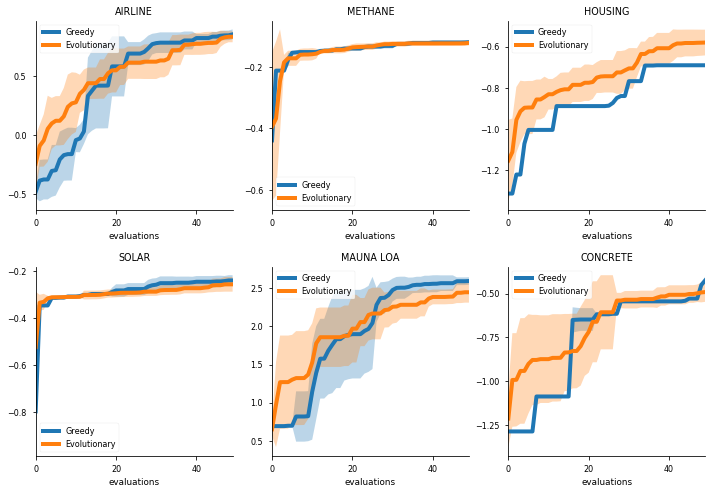

In [7]:
plt.style.use('seaborn-paper')

fig, axes =  plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
((ax00, ax01, ax02), (ax10, ax11, ax12)) = axes

x_label = 'evaluations'
cks_label = 'Greedy'
eks_label = 'Evolutionary'
random_label = 'Random'

plot_mean_pm_std(best_scores_cks_airline, ax00, label=cks_label)
plot_mean_pm_std(best_scores_eks_airline, ax00, label=eks_label)
ax00.set_title("AIRLINE")
ax00.legend()

plot_mean_pm_std(best_scores_cks_methane, ax01, label=cks_label)
plot_mean_pm_std(best_scores_eks_methane, ax01, label=eks_label)
ax01.set_title("METHANE")
ax01.legend()

plot_mean_pm_std(best_scores_cks_housing, ax02, label=cks_label)
plot_mean_pm_std(best_scores_eks_housing, ax02, label=eks_label)
ax02.set_title("HOUSING")
ax02.legend()

plot_mean_pm_std(best_scores_cks_solar, ax10, label=cks_label)
plot_mean_pm_std(best_scores_eks_solar, ax10, label=eks_label)
ax10.set_title("SOLAR")
ax10.legend()

plot_mean_pm_std(best_scores_cks_mauna, ax11, label=cks_label)
plot_mean_pm_std(best_scores_eks_mauna, ax11, label=eks_label)
ax11.set_title("MAUNA LOA")
ax11.legend()

plot_mean_pm_std(best_scores_cks_concrete, ax12, label=cks_label)
plot_mean_pm_std(best_scores_eks_concrete, ax12, label=eks_label)
ax12.set_title("CONCRETE")
ax12.legend()

for ax in axes.reshape(-1): 
    hide_upper_ax_lines(ax)
    ax.set_xlabel(x_label)
    ax.locator_params(nbins=5, axis='y')
    ax.locator_params(nbins=4, axis='x')

plt.subplots_adjust(hspace = 0.3)
plt.show()